In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_csv_data = pd.read_csv('Wellbeing_and_lifestyle_data.csv')

In [3]:
df = raw_csv_data.copy()

In [4]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female


<b>Data Cleaning<b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          12756 non-null  object
 1   FRUITS_VEGGIES     12756 non-null  int64 
 2   DAILY_STRESS       12756 non-null  object
 3   PLACES_VISITED     12756 non-null  int64 
 4   CORE_CIRCLE        12756 non-null  int64 
 5   SUPPORTING_OTHERS  12756 non-null  int64 
 6   SOCIAL_NETWORK     12756 non-null  int64 
 7   ACHIEVEMENT        12756 non-null  int64 
 8   DONATION           12756 non-null  int64 
 9   BMI_RANGE          12756 non-null  int64 
 10  TODO_COMPLETED     12756 non-null  int64 
 11  FLOW               12756 non-null  int64 
 12  DAILY_STEPS        12756 non-null  int64 
 13  LIVE_VISION        12756 non-null  int64 
 14  SLEEP_HOURS        12756 non-null  int64 
 15  LOST_VACATION      12756 non-null  int64 
 16  DAILY_SHOUTING     12756 non-null  int64

In [6]:
df = df.drop(['Timestamp'],axis=1)

In [7]:
for column in df:
    print(f'{column} : {df[column].unique()}')

FRUITS_VEGGIES : [3 2 5 4 1 0]
DAILY_STRESS : ['2' '3' '1' '4' '5' '0' '1/1/00']
PLACES_VISITED : [ 2  4  3 10  5  6  7  0  8  1  9]
CORE_CIRCLE : [ 5  3  4  9  6  7  8 10  2  1  0]
SUPPORTING_OTHERS : [ 0  8  4 10  5  3  1  2  6  7  9]
SOCIAL_NETWORK : [ 5 10  7  4  3  1  2  8  6  9  0]
ACHIEVEMENT : [ 2  5  3  4  0  1  6 10  8  7  9]
DONATION : [0 2 5 4 3 1]
BMI_RANGE : [1 2]
TODO_COMPLETED : [ 6  5  2  3  8 10  7  4  1  0  9]
FLOW : [ 4  2  5  0  1  8  7  6  3 10  9]
DAILY_STEPS : [ 5  4  7  8  1  3  6  2 10  9]
LIVE_VISION : [ 0  5 10  4  2  1  6  3  8  9  7]
SLEEP_HOURS : [ 7  8  5  6 10  9  4  3  2  1]
LOST_VACATION : [ 5  2 10  7  0  3  1  4  8  6  9]
DAILY_SHOUTING : [ 5  2  0  3  1  7  6  4 10  8  9]
SUFFICIENT_INCOME : [1 2]
PERSONAL_AWARDS : [ 4  3  5  8 10  1  2  7  6  0  9]
TIME_FOR_PASSION : [ 0  2  8  1  3  6  5  4 10  9  7]
DAILY_MEDITATION : [ 5  6  3  0 10  2  1  7  4  8  9]
AGE : ['36 to 50' '51 or more' '21 to 35' 'Less than 20']
GENDER : ['Female' 'Male']


In [8]:
df[df['DAILY_STRESS']=='1/1/00'] 


,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
10005,3,1/1/00,1,2,10,10,5,5,2,6,...,3,6,10,1,2,10,8,2,21 to 35,Male


In [9]:
df.drop(10005, inplace=True)


In [10]:
num = pd.to_numeric(df['DAILY_STRESS'])
df['DAILY_STRESS'] = num

<b>Creating a new feature (target feature)<b>

Any stress level greater than median will be considered as excessive and thus unhealthy.

In [11]:
median_stress_level = df['DAILY_STRESS'].median()
targets = np.where(df['DAILY_STRESS'] > median_stress_level, 1, 0)

In [12]:
df['UNHEALTHY_STRESS'] = targets

In [13]:
data_with_targets = df.drop(['DAILY_STRESS'], axis=1)

In [14]:
data_with_targets.head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER,UNHEALTHY_STRESS
0,3,2,5,0,5,2,0,1,6,4,...,7,5,5,1,4,0,5,36 to 50,Female,0
1,2,4,3,8,10,5,2,2,5,2,...,8,2,2,2,3,2,6,36 to 50,Female,0
2,2,3,4,4,10,3,2,2,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,0
3,3,10,3,10,7,2,5,2,3,5,...,5,7,5,1,5,2,0,51 or more,Female,0
4,5,3,3,10,4,2,4,2,5,0,...,7,0,0,2,8,1,5,51 or more,Female,0


<b>Exploratory Data Analysis<b>

<AxesSubplot:xlabel='UNHEALTHY_STRESS', ylabel='count'>

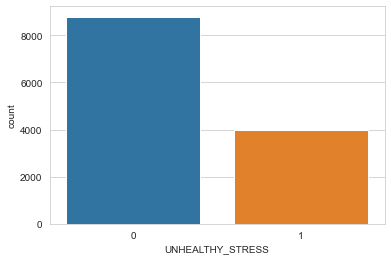

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='UNHEALTHY_STRESS', data = data_with_targets)

Majority of peaople in our dataset didn't experience unhealthy stress

<AxesSubplot:xlabel='UNHEALTHY_STRESS', ylabel='count'>

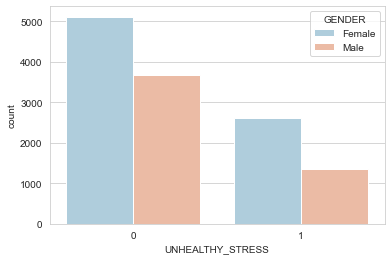

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='UNHEALTHY_STRESS', hue = 'GENDER', data = data_with_targets, palette='RdBu_r')

More Females than males are exposed to excessive stress

In [17]:
data_with_targets['UNHEALTHY_STRESS'].sum()

3963

In [18]:
data_with_targets['UNHEALTHY_STRESS'].shape[0]

12755

In [19]:
df['UNHEALTHY_STRESS'].sum()/df['UNHEALTHY_STRESS'].shape[0]

0.31070168561348493

Our dataset is imbalanced.

In [20]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [21]:
display(data_with_targets.head())

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER,UNHEALTHY_STRESS
0,3,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,0
1,2,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,0
2,2,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,0
3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,0
4,5,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,0


<b>Handling categorical features<b>

In [22]:
df2 = pd.get_dummies(data = data_with_targets, columns = ['GENDER', 'SUFFICIENT_INCOME'], drop_first = True)
df2.columns

Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS',
       'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS',
       'LOST_VACATION', 'DAILY_SHOUTING', 'PERSONAL_AWARDS',
       'TIME_FOR_PASSION', 'DAILY_MEDITATION', 'AGE', 'UNHEALTHY_STRESS',
       'GENDER_Male', 'SUFFICIENT_INCOME_2'],
      dtype='object')

In [23]:
df2['AGE'].unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [24]:
df2['AGE'] = df2['AGE'].map({'Less than 20':1, '21 to 35':2, '36 to 50':3, '51 or more':4})

In [25]:
df2.head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,UNHEALTHY_STRESS,GENDER_Male,SUFFICIENT_INCOME_2
0,3,2,5,0,5,2,0,1,6,4,5,0,7,5,5,4,0,5,3,0,0,0
1,2,4,3,8,10,5,2,2,5,2,5,5,8,2,2,3,2,6,3,0,0,1
2,2,3,4,4,10,3,2,2,2,2,4,5,8,10,2,4,8,3,3,0,0,1
3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,5,2,0,4,0,0,0
4,5,3,3,10,4,2,4,2,5,0,5,0,7,0,0,8,1,5,4,0,0,1


In [26]:
df2.columns.values

array(['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'DAILY_MEDITATION', 'AGE',
       'UNHEALTHY_STRESS', 'GENDER_Male', 'SUFFICIENT_INCOME_2'],
      dtype=object)

In [27]:
df2.columns = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'DAILY_MEDITATION', 'AGE',
       'UNHEALTHY_STRESS', 'MALE', 'SUFFICIENT_INCOME']

In [28]:
cols_to_scale = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
        'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'DAILY_MEDITATION']

<b>Feature Scaling<b>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [30]:
df2.head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,UNHEALTHY_STRESS,MALE,SUFFICIENT_INCOME
0,0.048057,-1.007673,-0.170058,-1.709685,-0.503007,-0.713377,-1.449036,1,0.111560,0.374224,-0.244277,-1.144176,-0.029282,0.590355,0.773076,-0.547749,-1.200426,-0.412936,3,0,0,0
1,-0.640668,-0.404139,-0.871463,0.742610,1.118386,0.376730,-0.375972,2,-0.268197,-0.482498,-0.244277,0.396995,0.802558,-0.226759,-0.342291,-0.869458,-0.465430,-0.083419,3,0,0,1
2,-0.640668,-0.705906,-0.520761,-0.483537,1.118386,-0.350008,-0.375972,2,-1.407467,-0.482498,-0.590857,0.396995,0.802558,1.952212,-0.342291,-0.547749,1.739557,-1.071969,3,0,0,1
3,0.048057,1.406465,-0.871463,1.355683,0.145550,-0.713377,1.233624,2,-1.027710,0.802584,-0.244277,-1.144176,-1.692963,1.135098,0.773076,-0.226041,-0.465430,-2.060520,4,0,0,0
4,1.425506,-0.705906,-0.871463,1.355683,-0.827285,-0.713377,0.697092,2,-0.268197,-1.339219,-0.244277,-1.144176,-0.029282,-0.771502,-1.085869,0.739085,-0.832928,-0.412936,4,0,0,1


In [31]:
X = df2.drop(['UNHEALTHY_STRESS'], axis=1)
y = df2['UNHEALTHY_STRESS']

<b>Balancing the data<b>

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    8792
1    8792
Name: UNHEALTHY_STRESS, dtype: int64

<b>Splitting the data to prevent overfitting<b>

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=0, stratify=y_sm)

X_train.shape, X_test.shape

((14067, 21), (3517, 21))

<b>Feature Selection<b>

In [34]:
# using variance threshold
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [35]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [36]:
# Finding non-constant features
sum(var_thres.get_support())



21

In [37]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

# so we have no constant features here

0


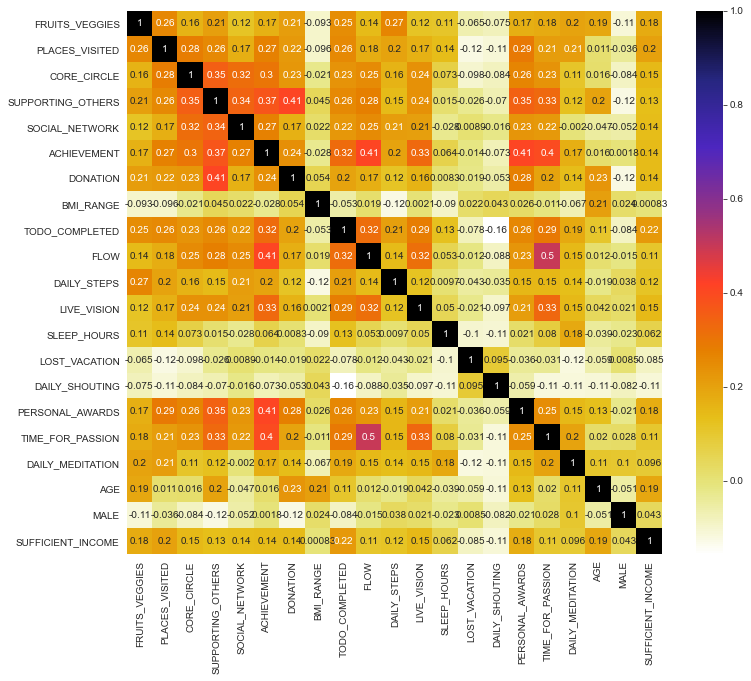

In [38]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [39]:
# with the following function we can select highly correlated features


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

0

In [41]:
# so we have no highly correlated features here

In [42]:
# Using Information Gain

In [43]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.1325025 , 0.16637146, 0.18045448, 0.16545424, 0.14470982,
       0.1805918 , 0.12028996, 0.        , 0.17765812, 0.17016131,
       0.1768624 , 0.16733289, 0.13669864, 0.12843736, 0.18863221,
       0.16516976, 0.17560559, 0.17968505, 0.00440517, 0.01058382,
       0.02349973])

In [44]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

DAILY_SHOUTING       0.188632
ACHIEVEMENT          0.180592
CORE_CIRCLE          0.180454
DAILY_MEDITATION     0.179685
TODO_COMPLETED       0.177658
DAILY_STEPS          0.176862
TIME_FOR_PASSION     0.175606
FLOW                 0.170161
LIVE_VISION          0.167333
PLACES_VISITED       0.166371
SUPPORTING_OTHERS    0.165454
PERSONAL_AWARDS      0.165170
SOCIAL_NETWORK       0.144710
SLEEP_HOURS          0.136699
FRUITS_VEGGIES       0.132502
LOST_VACATION        0.128437
DONATION             0.120290
SUFFICIENT_INCOME    0.023500
MALE                 0.010584
AGE                  0.004405
BMI_RANGE            0.000000
dtype: float64

<AxesSubplot:>

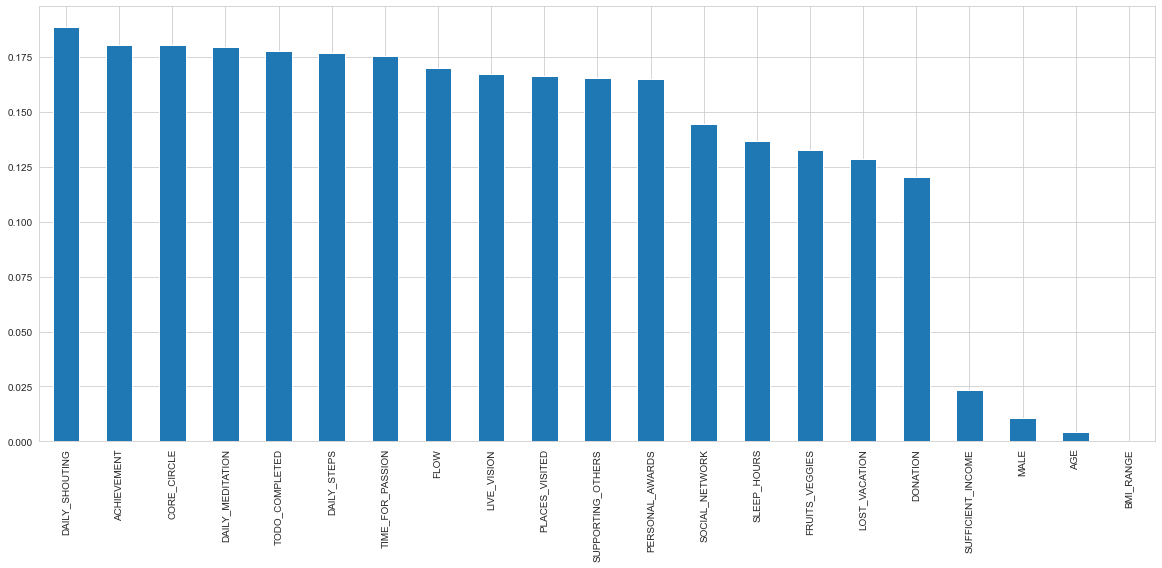

In [45]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [46]:
from sklearn.feature_selection import SelectKBest

In [47]:
sel_cols = SelectKBest(mutual_info_classif, k=10)
sel_cols.fit(X_train, y_train)
X_train.columns[sel_cols.get_support()]

Index(['PLACES_VISITED', 'CORE_CIRCLE', 'ACHIEVEMENT', 'TODO_COMPLETED',
       'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'DAILY_SHOUTING',
       'TIME_FOR_PASSION', 'DAILY_MEDITATION'],
      dtype='object')

<b>Model building<b>

In [48]:
X_sm2 = df2[['CORE_CIRCLE', 'ACHIEVEMENT', 'TODO_COMPLETED', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'TIME_FOR_PASSION',
       'DAILY_MEDITATION', 'SUFFICIENT_INCOME']]
y_sm = df2['UNHEALTHY_STRESS']

X_train, X_test, y_train, y_test = train_test_split(X_sm2, y_sm, test_size = 0.2, random_state=0, stratify=y_sm)


In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [50]:
logmodel.score(X_train, y_train)

0.7232457859662877

In [51]:
y_pred = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1618,  140],
       [ 584,  209]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.82      1758
           1       0.60      0.26      0.37       793

    accuracy                           0.72      2551
   macro avg       0.67      0.59      0.59      2551
weighted avg       0.69      0.72      0.68      2551



In [54]:
from sklearn.metrics import accuracy_score


In [55]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7161897295178361

In [56]:
weights = pd.Series(logmodel.coef_[0], index=X_sm2.columns.values)
weights.sort_values(ascending=False)

DAILY_SHOUTING       0.428244
LOST_VACATION        0.301326
LIVE_VISION         -0.077664
ACHIEVEMENT         -0.079218
TIME_FOR_PASSION    -0.080354
CORE_CIRCLE         -0.090715
TODO_COMPLETED      -0.091428
SLEEP_HOURS         -0.139737
DAILY_MEDITATION    -0.240837
SUFFICIENT_INCOME   -0.350240
dtype: float64

In order to prevent high stress level leading to depression it is necessary to maintain sufficient income, 
have enough time spent on daily meditation (or praying) and get more sleep. Factors such as daily shouting or lost vacation 
contribute to higher stress level.